# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 656


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


# Define an empty list to fetch the weather data for each city

city_data = []



# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url  + "&q=" + city.replace(" ","+")
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"] 
    
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # city_date = city_weather["Date"]

        #   Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(city_data) 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | deputatskiy
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | bubaque
Processing Record 6 of Set 1 | shelburne
Processing Record 7 of Set 1 | kalianget
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | saint-paul
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | itarema
Processing Record 12 of Set 1 | yulara
Processing Record 13 of Set 1 | sao joao da barra
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | marcona
City not found. Skipping...
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | salta
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | poum
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | belus

In [5]:
pd.DataFrame(city_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,deputatskiy,69.3000,139.9000,-39.21,99,89,3.40,RU
1,bengkulu,-3.8004,102.2655,75.16,93,100,9.82,ID
2,mataura,-46.1927,168.8643,44.89,97,4,1.68,NZ
3,bubaque,11.2833,-15.8333,73.38,78,8,7.90,GW
4,shelburne,44.0787,-80.2041,29.23,96,92,15.86,CA
...,...,...,...,...,...,...,...,...
598,zhumadian,32.9794,114.0294,23.11,18,0,6.96,CN
599,mahon,39.8885,4.2658,46.96,87,75,17.27,ES
600,omsukchan,62.5333,155.8000,-17.54,98,100,5.08,RU
601,sambava,-14.2667,50.1667,86.00,66,100,14.38,MG


In [6]:
city_weather

{'coord': {'lon': 172.6333, 'lat': -43.5333},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 57.45,
  'feels_like': 56.98,
  'temp_min': 56.48,
  'temp_max': 59.32,
  'pressure': 1023,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 90},
 'clouds': {'all': 100},
 'dt': 1674561900,
 'sys': {'type': 1,
  'id': 7348,
  'country': 'NZ',
  'sunrise': 1674580752,
  'sunset': 1674633819},
 'timezone': 46800,
 'id': 2192362,
 'name': 'Christchurch',
 'cod': 200}

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,deputatskiy,69.3000,139.9000,-39.21,99,89,3.40,RU
1,bengkulu,-3.8004,102.2655,75.16,93,100,9.82,ID
2,mataura,-46.1927,168.8643,44.89,97,4,1.68,NZ
3,bubaque,11.2833,-15.8333,73.38,78,8,7.90,GW
4,shelburne,44.0787,-80.2041,29.23,96,92,15.86,CA


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,deputatskiy,69.3000,139.9000,-39.21,99,89,3.40,RU
1,bengkulu,-3.8004,102.2655,75.16,93,100,9.82,ID
2,mataura,-46.1927,168.8643,44.89,97,4,1.68,NZ
3,bubaque,11.2833,-15.8333,73.38,78,8,7.90,GW
4,shelburne,44.0787,-80.2041,29.23,96,92,15.86,CA


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [11]:
Lat_Temp = city_data_df[["Lat", "Max Temp"]]
Lat_Humid = city_data_df[["Lat", "Humidity"]]
Lat_Cloud = city_data_df[["Lat", "Cloudiness"]]
Lat_Wind = city_data_df[["Lat", "Wind Speed"]]
Lat_Temp.head()

,Lat,Max Temp
City_ID,,
0,69.3000,-39.21
1,-3.8004,75.16
2,-46.1927,44.89
3,11.2833,73.38
4,44.0787,29.23


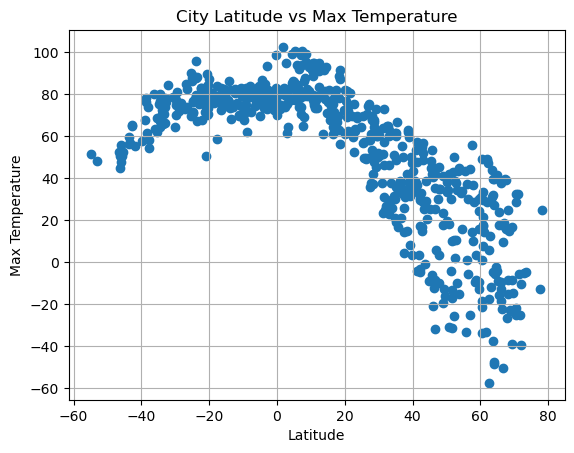

In [12]:
# Build scatter plot for latitude vs. temperature
Lat_Temp = city_data_df[["Lat", "Max Temp"]]

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

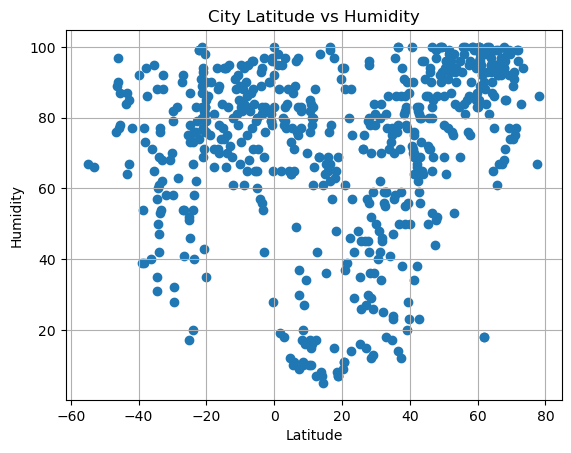

In [13]:
# Build the scatter plots for latitude vs. humidity
Lat_Humid = city_data_df[["Lat", "Humidity"]]

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

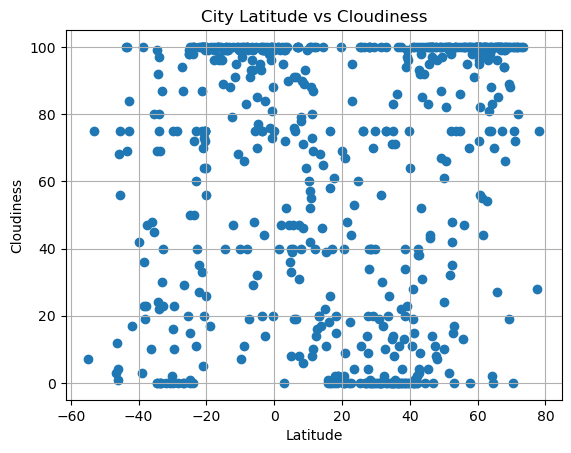

In [14]:
# Build the scatter plots for latitude vs. cloudiness
Lat_Cloud = city_data_df[["Lat", "Cloudiness"]]

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

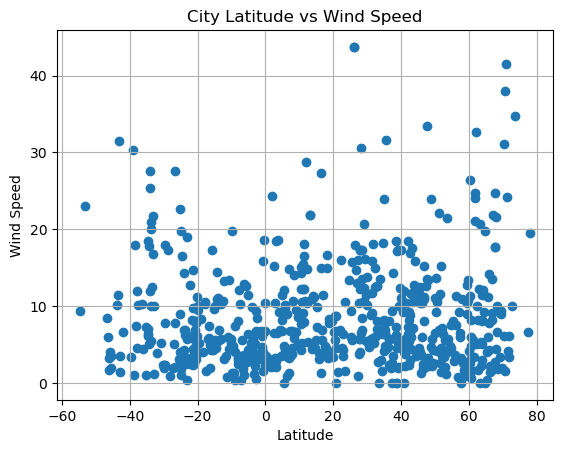

In [15]:
# Build the scatter plots for latitude vs. wind speed
Lat_Cloud = city_data_df[["Lat", "Wind Speed"]]

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [16]:
city_data_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,18.283980,22.083971,51.701708,71.563847,60.190713,8.475970
std,32.903211,87.871047,33.418281,24.030237,39.188764,6.864689
min,-54.800000,-175.200000,-57.550000,5.000000,0.000000,0.000000
25%,-9.059150,-53.568800,32.240000,61.000000,19.000000,3.690000
50%,20.502200,24.483300,63.500000,78.000000,75.000000,6.530000
75%,45.811050,103.158500,78.160000,90.000000,100.000000,11.195000
max,78.218600,179.316700,102.450000,100.000000,100.000000,43.730000


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

In [18]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,deputatskiy,69.3000,139.9000,-39.21,99,89,3.40,RU
3,bubaque,11.2833,-15.8333,73.38,78,8,7.90,GW
4,shelburne,44.0787,-80.2041,29.23,96,92,15.86,CA
6,dikson,73.5069,80.5464,-4.90,94,100,34.76,RU
8,hasaki,35.7333,140.8333,33.22,97,71,31.59,JP


In [19]:
# Define a function to create Linear Regression plots
Lat_Temp = city_data_df[["Max Temp", "Lat"]]
Lat_Temp_Linear = round(st.pearsonr(['Max Temp'],['Lat'])[0],2)

print(f"The correlation between latitiude and Max Temperature is {Lat_Temp_Linear}")

ValueError: x and y must have length at least 2.

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
1,tromso,69.6496,18.9570,41.38,65,75,32.21,NO
2,cabo san lucas,22.8909,-109.9124,64.51,83,54,1.01,MX
5,ruidoso,33.3317,-105.6730,39.56,47,100,10.36,US
6,ca mau,9.1769,105.1500,88.59,53,87,10.78,VN
7,sioux lookout,50.1001,-91.9170,19.47,86,100,10.36,CA


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,tadine,-21.5500,167.8833,80.29,83,92,5.39,NC
3,mataura,-46.1927,168.8643,52.39,71,7,4.21,NZ
4,general pico,-35.6566,-63.7568,67.73,58,0,3.27,AR
12,ushuaia,-54.8000,-68.3000,53.26,50,0,10.36,AR
13,roebourne,-20.7833,117.1333,92.16,48,3,13.13,AU


###  Temperature vs. Latitude Linear Regression Plot

The p-value is: 1.3945110233121849e-105
The r-value is: -0.8505413117383255


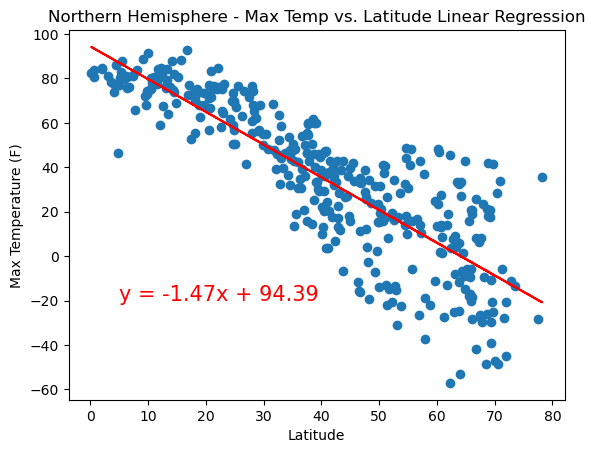

In [ ]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/north_temp_lg.png")
plt.show() 

The p-value is: 9.63330350522176e-09
The r-value is: 0.42122695770632046


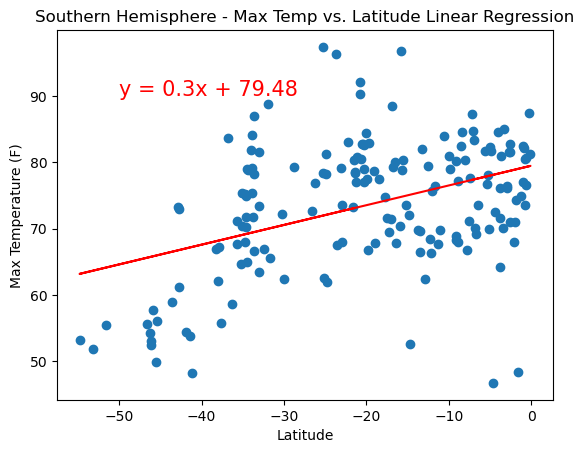

In [ ]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/north_temp_lg.png")
plt.show() 

 The linear regression is modeling what happens to Maximum temperature as latitudes increase in the northern and southern hemispheres. It shows that for the northern hemisphere with increase in temperature there is a move away from the equator as the latitude increases.  On the other hand, there is a decrease away from the equator as the temperature increases.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The p-value is: 5.980561792645445e-18
The r-value is: 0.42685954576636753


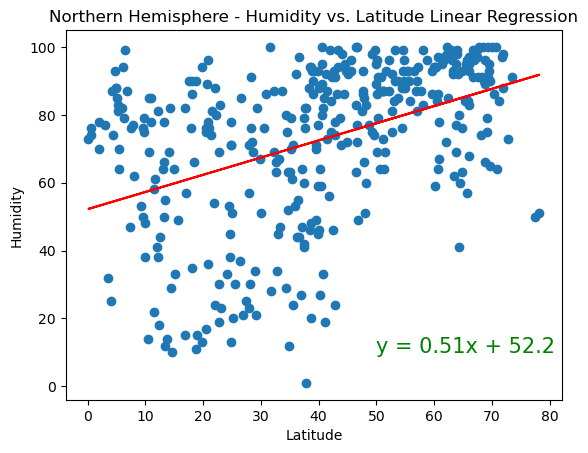

In [ ]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Humidity vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.show() 

lat and humidity

The p-value is: 0.0014116935823835371
The r-value is: 0.22260854568621893


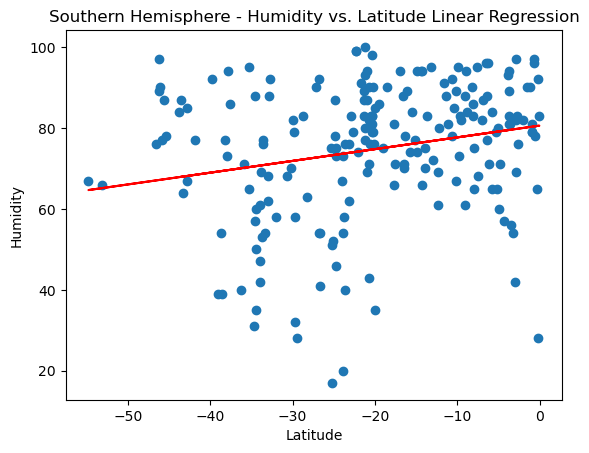

In [21]:
# Southern Hemisphere

x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Southern Hemisphere - Humidity vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.show() 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression is modeling what happens to Humidity as latitudes increase in the northern and southern hemispheres. 
As latitude increases in the northern hemisphere so does humidity. There is a scatterd correlation between humidity and latitude as theres an increase in humidity as we move towards the equator in the southern Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

The p-value is: 6.138941879153642e-10
The r-value is: 0.30298818694061175


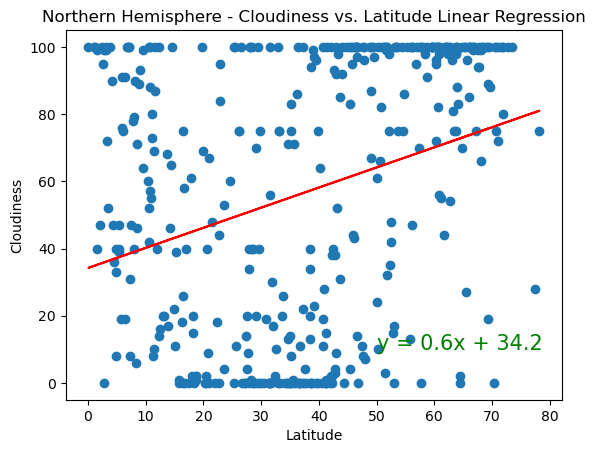

In [23]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")


plt.show() 

The p-value is: 2.8263435706544403e-10
The r-value is: 0.42426355347851413


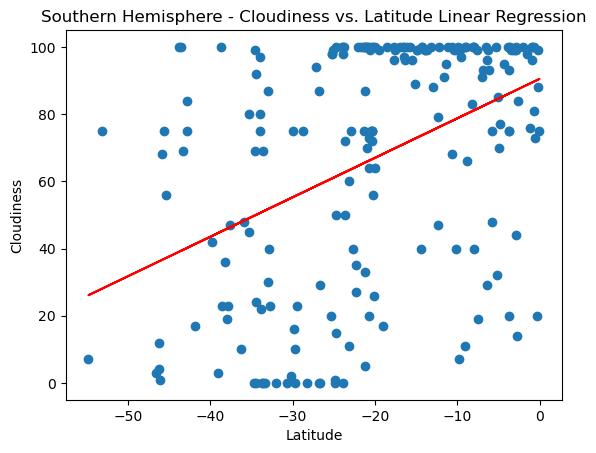

In [22]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: southern Hemisphere - Cloudiness vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.show() 


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. there is no correlation between cloudiness and latitude for the northern hemisphere cloudiness increases for the southern hemisphere as we move closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.3970787326671553
The r-value is: 0.04397461210121499


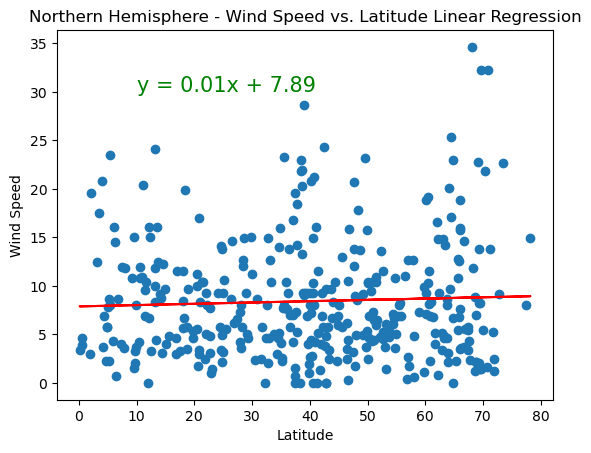

In [ ]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/north_temp_lg.png")
plt.show() 

The p-value is: 0.016391485087445895
The r-value is: -0.18332508102377942


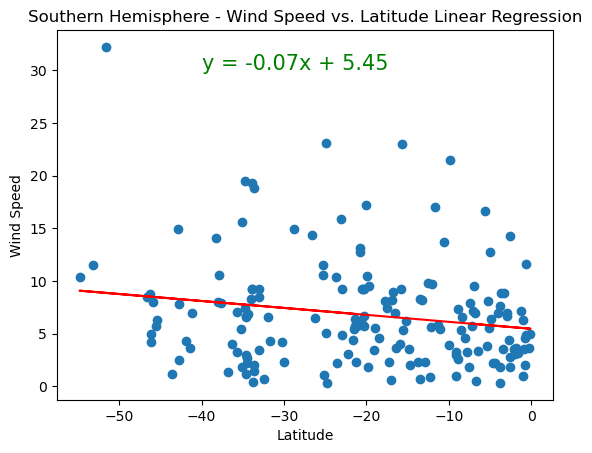

In [ ]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")
plt.show() 

As wind speed increases for the northern hemisphere we move further away from the equator, and as wind speed picks up we move to the equator for the southern hemisphere.